In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
sales_data = pd.read_csv('diwali_sales_data.csv',encoding='unicode_escape')
sales_data

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [9]:
sales_data.shape

(11251, 15)

In [10]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [12]:
#  Data Cleaning

# Drop unrelated and black columns
sales_data.drop(['Status','unnamed1'],axis=1,inplace=True)

In [14]:
# check for null values
pd.isnull(sales_data).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [16]:
sales_data.shape

(11251, 13)

In [17]:
# Drop null values
sales_data.dropna(inplace =True)

In [18]:
sales_data.shape

(11239, 13)

In [20]:
# Change the data type of Amount Column 
sales_data['Amount'] = sales_data['Amount'].astype('int')

In [21]:
# Check the data type 
sales_data['Amount'].dtypes

dtype('int32')

In [23]:
# Describe the specfic columns
sales_data[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


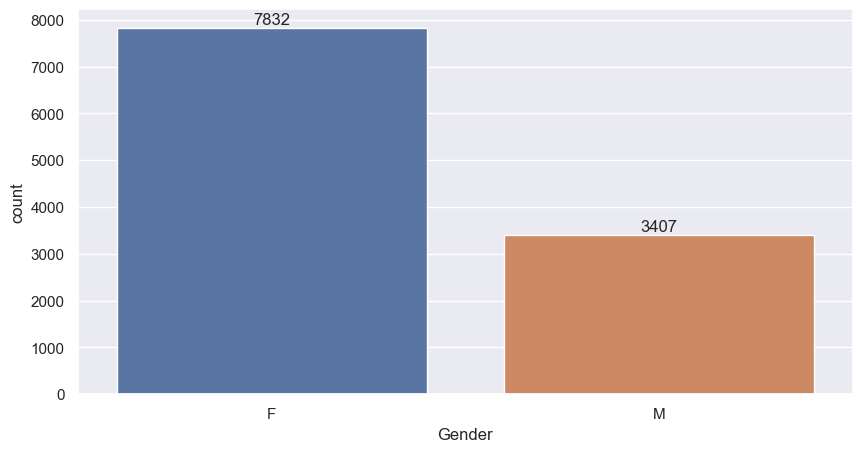

In [73]:
#  Gender
gen = sns.countplot(x = 'Gender',data=sales_data)
for bars in gen.containers:
    gen.bar_label(bars)


<Axes: xlabel='Gender', ylabel='Amount'>

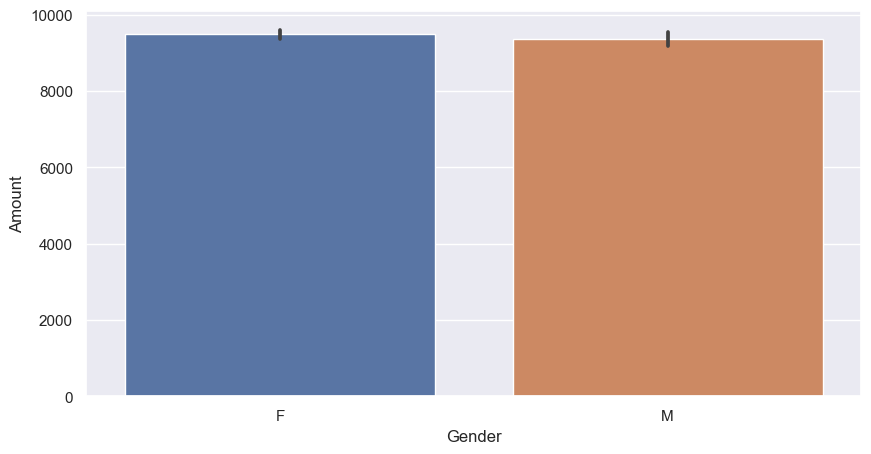

In [74]:
sales_gen = sales_data.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Gender',y ='Amount',data =sales_data)

In [39]:
sales_data.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

#  form above graphs we can see that most of the buyers are female and even the pirchasing power of female are grater than men


,Gender,Amount
0,F,74335853
1,M,31913276


In [37]:
# Age

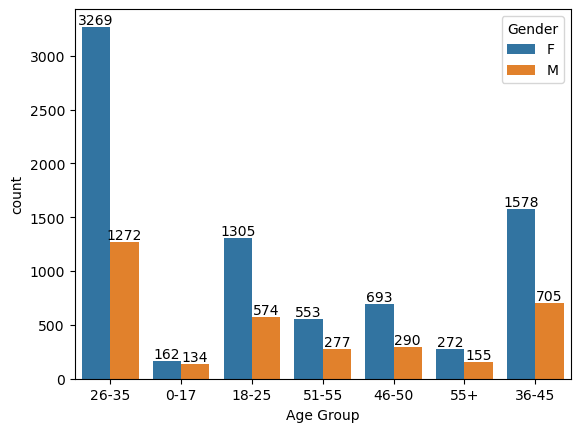

In [40]:
age_group = sns.countplot(data = sales_data,x = 'Age Group',hue='Gender')
for bars in age_group.containers:
    age_group.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

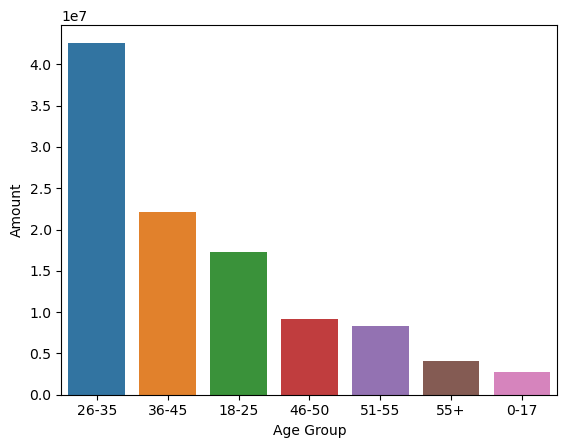

In [43]:
#  Total Amount vs Age Group
sales_age = sales_data.groupby(['Age Group'],as_index= False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group',y = 'Amount',data = sales_age)

In [44]:
# From above graphs we can see that most of the buyers are of age group between 26 -35 female


In [45]:
# State

In [46]:
# Total number of orders from top 10 states

<Axes: xlabel='State', ylabel='Orders'>

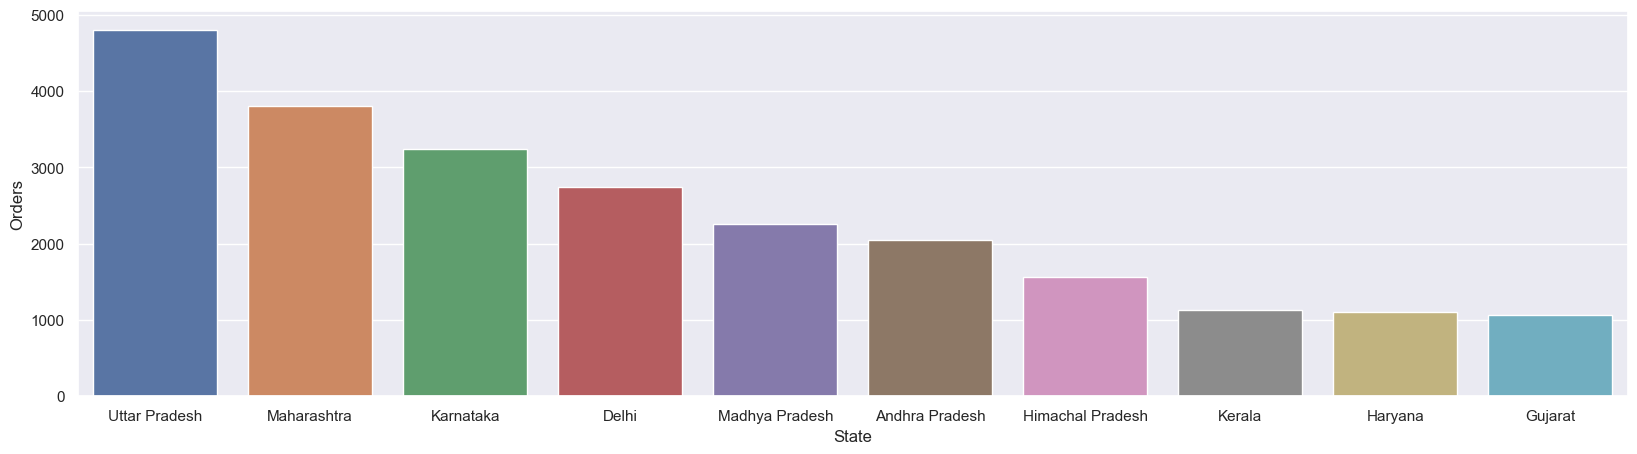

In [55]:
sales_state = sales_data.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.barplot(data = sales_data ,x = 'State',y='Orders')

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state,x='State',y='Orders')

<Axes: xlabel='State', ylabel='Amount'>

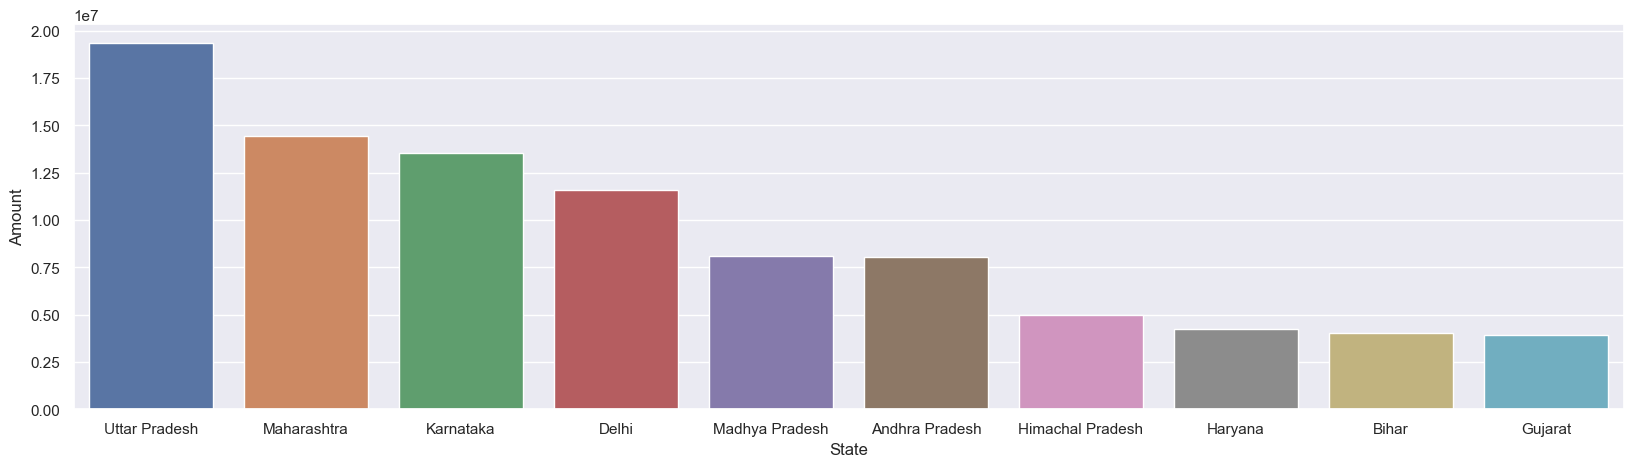

In [56]:
# Total amount/states form top 10 states
sales_state = sales_data.groupby(['State'],as_index = False)['Amount'].sum().sort_values(by='Amount',ascending = False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state,x='State',y='Amount')

In [60]:
#  from above graphs we can see that most of the orders & total sales/amount are form uttar pradesh , maharastra and karnataka respectively 

sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.2+ MB


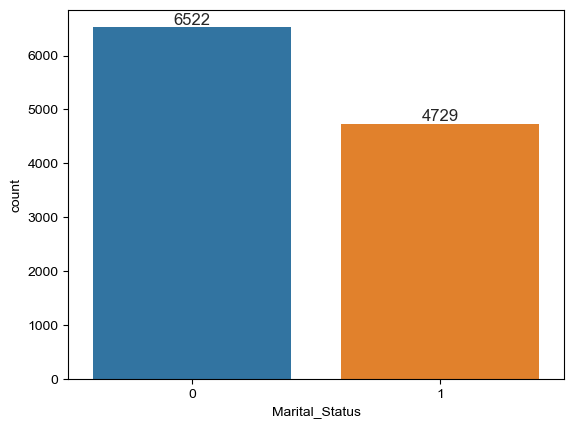

In [7]:
ax = sns.countplot(data =sales_data,x ='Marital_Status')
sns.set(rc={'figure.figsize':(5,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

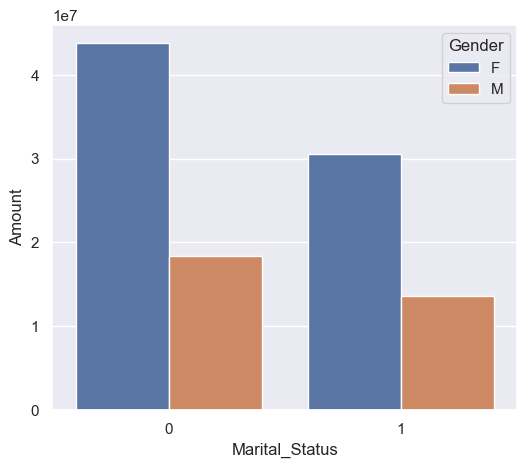

In [13]:
sales_state = sales_data.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

# sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data=sales_state,x = 'Marital_Status',y= 'Amount',hue='Gender')

In [14]:
# From above graphs we can see that most of the buyers are married(women) and they have high purchasing 

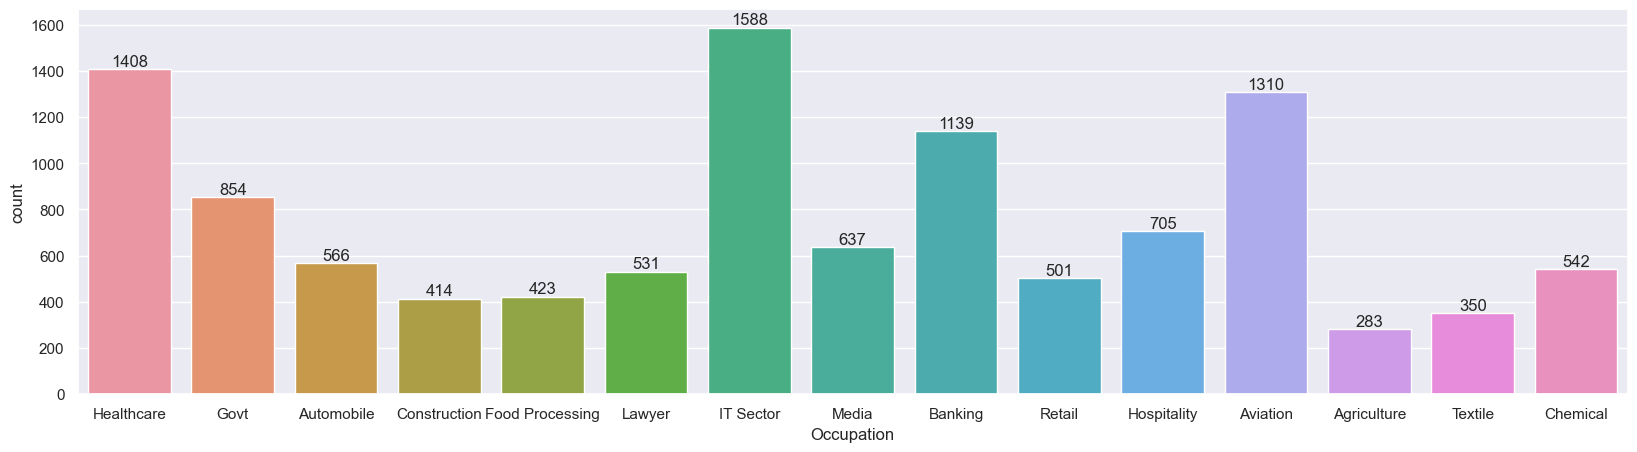

In [15]:
# Occupation

sns.set(rc={'figure.figsize':(20,5)})
ax=sns.countplot(data=sales_data,x='Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

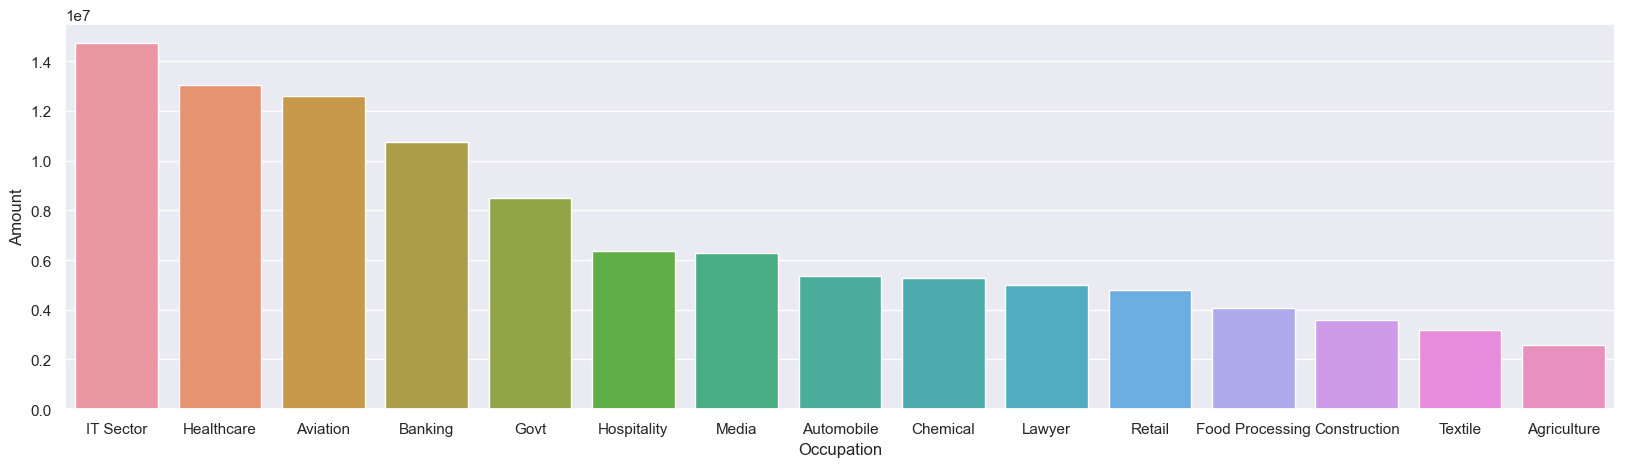

In [16]:
sales_state = sales_data.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(data = sales_state,x = 'Occupation',y = 'Amount')

In [17]:
#  Product Category

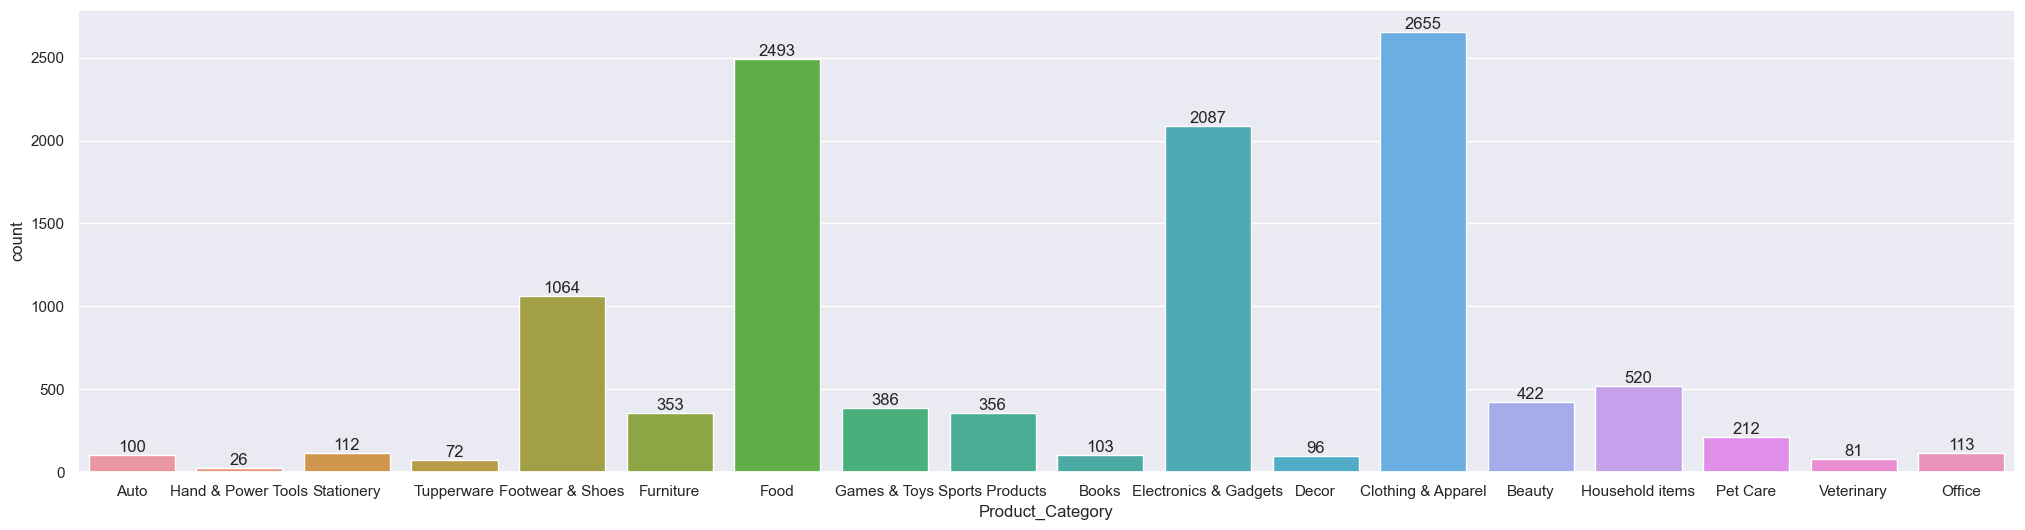

In [22]:
sns.set(rc = {'figure.figsize':(25,6)})
ax=sns.countplot(data = sales_data , x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

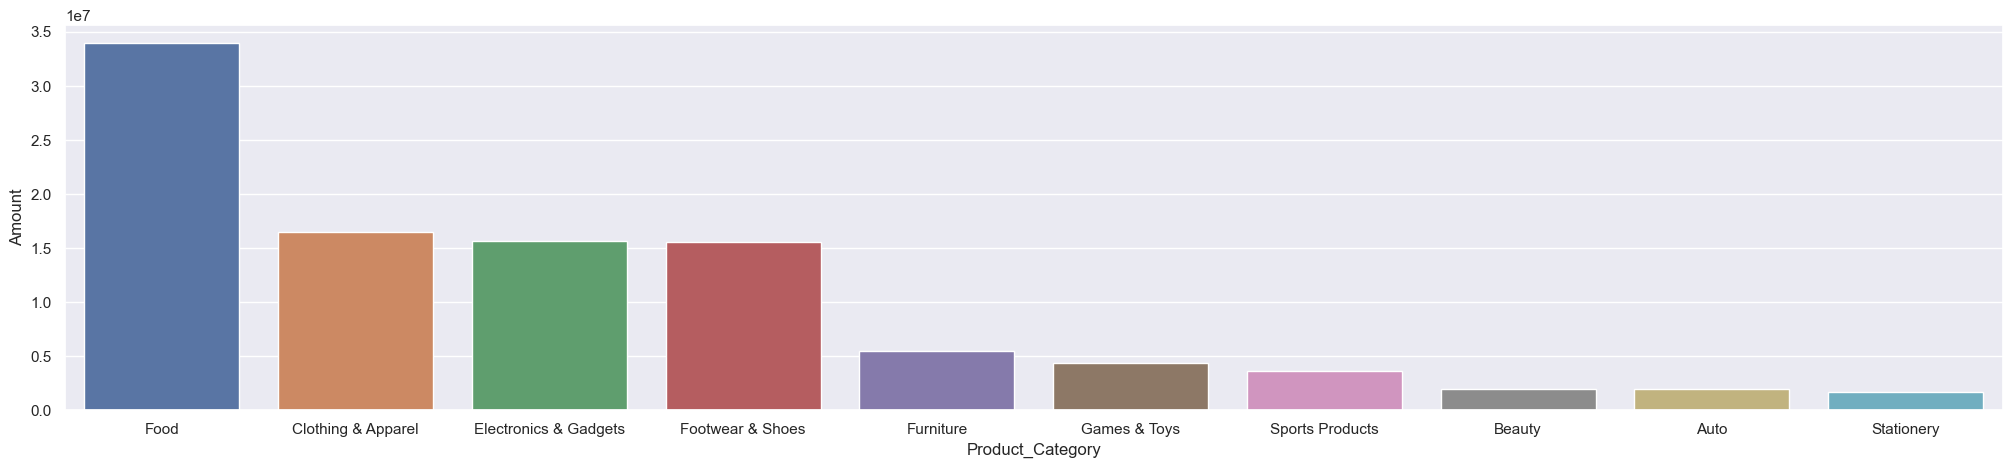

In [39]:
sales_state = sales_data.groupby(['Product_Category'],as_index = False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(data = sales_state,x = 'Product_Category',y ='Amount')

In [40]:
# from above the graph we can see that most of the sold products are form food , footwear and electronic category

<Axes: xlabel='Product_ID', ylabel='Orders'>

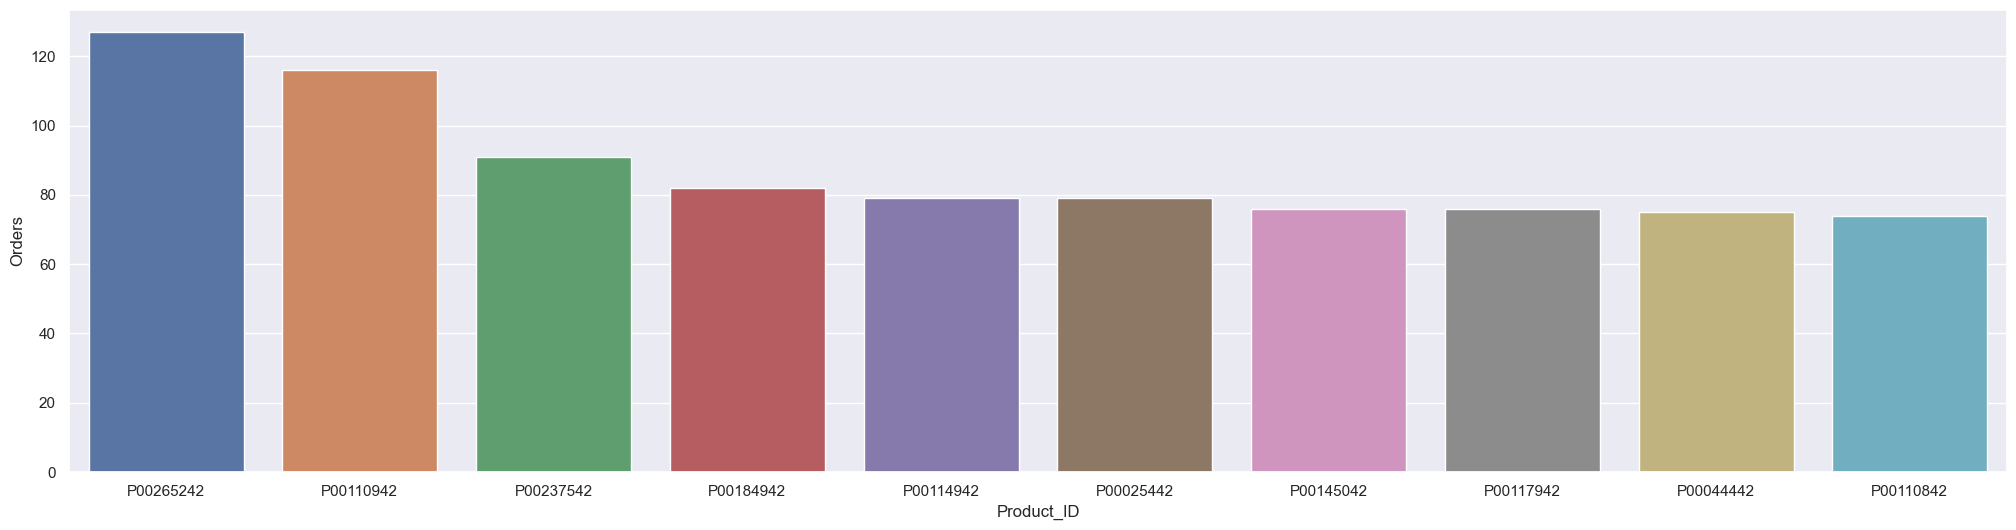

In [43]:
# Top 10 most sold product by Id number
sales_state = sales_data.groupby(['Product_ID'],as_index = False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(25,6)})
sns.barplot(data = sales_state , x = 'Product_ID',y = "Orders")


<Axes: xlabel='Product_ID'>

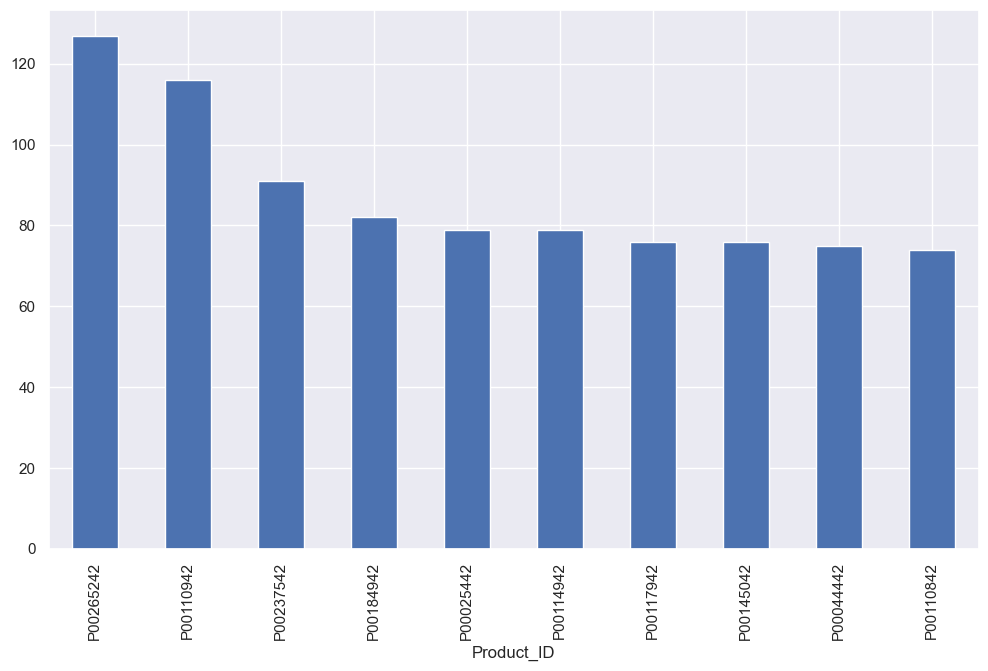

In [46]:
# Top 10 most sold product id in Another way
fig1 , ax1 =plt.subplots(figsize=(12,7))
sales_data.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending = False).plot(kind ='bar')

In [ ]:
# Category

# Married women age group 26 - 35 yrs from up , Maharastra and karnataka working in It , healthcare and Aviation sectores ,more liking buy product is food , clothing and electronic items